In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
from collections import Counter
from tqdm.notebook import tqdm
import joblib
from kiwipiepy import Kiwi
from collections import Counter
from tqdm.notebook import tqdm
from wordcloud import WordCloud
from PIL import Image
import networkx as nx
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Load

In [2]:
fnames = glob.glob('아프니까사장이다/*.csv')
dfs = [pd.read_csv(fname) for fname in fnames]
dfs_size = {fname.split('카페게시판_')[1].split('.csv')[0] : len(df) for fname, df in zip(fnames, dfs)}
df = pd.concat(dfs)

In [361]:
len(df), len(fnames)

(115407, 20)

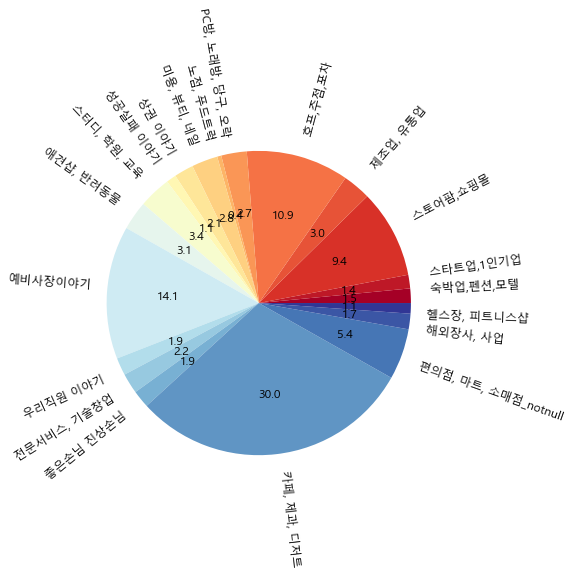

In [99]:
plt.figure(figsize=(16, 8))
pd.Series(dfs_size).plot.pie(autopct='%.1f', cmap=plt.cm.RdYlBu, fontsize=12, rotatelabels = True)
# plt.title('게시판별 수집된 게시글 비중', size=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [185]:
df_refined = df.dropna()[~df.dropna().content.str.contains('잘나가게')] #잘나가게 홍보 제외

In [187]:
#문장 빈도 확인+
counter = Counter()

for content in tqdm(df_refined.content):
    counter.update(content.split('\n'))

  0%|          | 0/114920 [00:00<?, ?it/s]

In [247]:
# check1
[(key, val) for key, val in sorted(counter.items(), key=lambda x: x[1], reverse=True) if val > 1]

[('', 774431),
 ('\u200b', 189164),
 ('\xa0', 93113),
 (' ', 90612),
 ('... 더보기', 8799),
 ('자영업자 필수 어플리케이션 다운받기', 7969),
 ('스토어팜 품앗이 금지 - 글 올리시 활동정지 ', 6017),
 (' (메뉴에 보시면 스토어팜 품앗이 카페 링크 있습니다. 그곳에서 해주시면 감사하겠습니다.)', 6017),
 ('.', 3815),
 ('스터디 카페 게시판에 거짓후기로 기만하는 사람들은 ', 2782),
 (' 왼쪽 메뉴 하단에 "신고하기"게시판에 신고 부탁드립니다. ', 2782),
 ('자기 전 침대에서 아싸카페를 즐기는 방법', 2713),
 ('안녕하세요', 2022),
 ('오늘의명언', 1984),
 ('복사', 1692),
 ('도움말', 1687),
 ('자신감은 위대한 과업의 첫째 요건이다.', 1635),
 ('-Samuel Johnson-', 1635),
 ('안녕하세요.', 1618),
 (', ', 1347),
 ('3월\xa0신규 샵인샵아이템\xa0 보기', 1234),
 ('. ', 1191),
 ('빠른 시일 내에 창업에 실패하는 경우는 대부분 상권분석에 실패한 경우가 대부분입니다', 1149),
 ('뒤통수 당하지 않는 프랜차이즈 분석법', 1148),
 ('최소', 1145),
 ('창업하시길 바랍니다.', 1141),
 ('\xa0아래 두 강의는 듣고 ', 1137),
 ('SKIP', 1128),
 ('sound_mute', 1124),
 ('00:00', 1117),
 ('감사합니다.', 1011),
 ('4월\xa0신규 샵인샵아이템\xa0 보기', 980),
 (')', 932),
 ('월 신규 샵인샵아이템\xa0 보기', 922),
 ('5월 신규 샵인샵아이템\xa0 보기', 875),
 ('2월 신규 샵인샵아이템\xa0 보기', 869),
 ('7', 856),
 ('(3개월만에 하루매출 120만원 돈까스,\xa0', 820),
 

In [220]:
# check2
temp = [(key, val) for key, val in sorted(counter.items(), key=lambda x: x[1], reverse=True) if '쪽지' in key and val > 1]
print(len(temp))
temp

264


[('쪽지로 판매하실 품목과', 47),
 ('쪽지주세요', 47),
 ('쪽지 부탁드립니다.', 35),
 ('쪽지로 판매하실 품목과 연락처 주세요', 29),
 ('쪽지 부탁드립니다', 28),
 ('쪽지 주세요', 27),
 ('쪽지로 판매하실 품목과 연락처 남겨주세요^^', 24),
 ('쪽지주세요!', 14),
 ('쪽지부탁드립니다', 13),
 ('쪽지로 연락처 남겨 주시면 확인 후 연락 드리겠습니다.', 13),
 ('쪽지주세요.', 13),
 ('쪽지 부탁드려요', 13),
 ('쪽지 주세요.', 13),
 ('연락(쪽지, 댓글)이 오는 경우가 많습니다. ', 13),
 ('문의는 댓글 또는 쪽지로 ', 12),
 ('연락처 ▶ *기재금지* 네이버 쪽지 기능으로 주고 받으세요 (연락처 기재시 글 삭제) ', 12),
 ('쪽지부탁드립니다.', 11),
 ('쪽지부탁드려요', 10),
 ('쪽지주세요^^', 9),
 ('매입단가는 이미지가 있으셔야 책정되니  쪽지로 판매하실 품목과 전번 남겨주세요', 9),
 ('쪽지주세요~', 9),
 ('쪽지 부탁드립니다!', 8),
 ('쪽지 부탁드려요~', 7),
 ('쪽지 주세요~', 7),
 ('쪽지 부탁드려요.', 7),
 ('이에 대해 관심있으신 사장님께서는 아래 댓글이나 쪽지를 보내주시면 감사하겠습니다.', 6),
 ('쪽지주세요~~', 6),
 ('댓글이나 쪽지 주세요!!', 5),
 ('있으신분 댓글 또는 쪽지주시면 연락드리겠습니다 ', 5),
 ('쪽지나 댓글 주세요', 5),
 ('쪽지나 댓글 주세요~', 5),
 ('쪽지 부탁드려요~~', 5),
 ('단가 쪽지 부탁드립니다.', 5),
 ('쪽지부탁드려요~', 5),
 ('[쪽지/댓글 문의는 답변이 늦습니다^^]', 5),
 ('관심있으신분 쪽지나댓글주셔요!', 4),
 ('쪽지부탁드립니다~^^', 4),
 ('# 이전 글에서 조언 댓글 및 쪽지남겨주신 사장님들께는 다시 한번 감사의 인사를 표합니다.', 4),
 ('빠른거래는 쪽지로 연락

In [252]:
# 제외할 문장들
stopwords = [k for k, v in counter.items() if v > 1 
             and '운영중' not in k 
             and '조언' not in k
             and '아시는' not in k
             and '지역은' not in k
             and '좋을' not in k
             and '도와주세' not in k
            ]
print(len(stopwords))

texts = df_refined.content.to_list()

# stopwords 제거
texts_nonstop = []
for text in tqdm(texts):
    texts_nonstop.append('\n'.join([t for t in text.split('\n') if t not in stopwords]))
    
# joblib.dump(texts_nonstop, 'texts_nonstop.list')

  0%|          | 0/114920 [00:00<?, ?it/s]

In [4]:
kiwi = Kiwi()
texts_nonstop = joblib.load('texts_nonstop.list')

In [9]:
#tokenizing
docs = []
for result in tqdm(kiwi.analyze(texts_nonstop), total=len(texts_nonstop)):
    docs.append(result[0][0])

  0%|          | 0/114920 [00:00<?, ?it/s]

In [8]:
#원하는 품사만 추출
tokenizedDocs = [[token.form for token in doc if token.tag[:2] in ['NN', 'VV', 'VA'] and token.len > 1] for doc in docs ]
# joblib.dump(tokenizedDocs, 'tokenizedDocs.list')

In [19]:
tokenizedDocs = joblib.load('tokenizedDocs.list')

In [372]:
df_refined['tokens'] = tokenizedDocs
df_refined['ym'] = df_refined['date'].apply(lambda x: x[:8])
df_refined['quarter'] = df_refined['ym'].apply(lambda x: x[:4]+ '-'+str((int(x[-3:-1])-1)//3 + 1))
# df_refined.to_csv('df_refined_NN_VV_VA.csv', index=False)

In [6]:
df_refined = pd.read_csv('df_refined_NN_VV_VA.csv')
df_refined['tokens'] = df_refined['tokens'].apply(lambda x: eval(x))

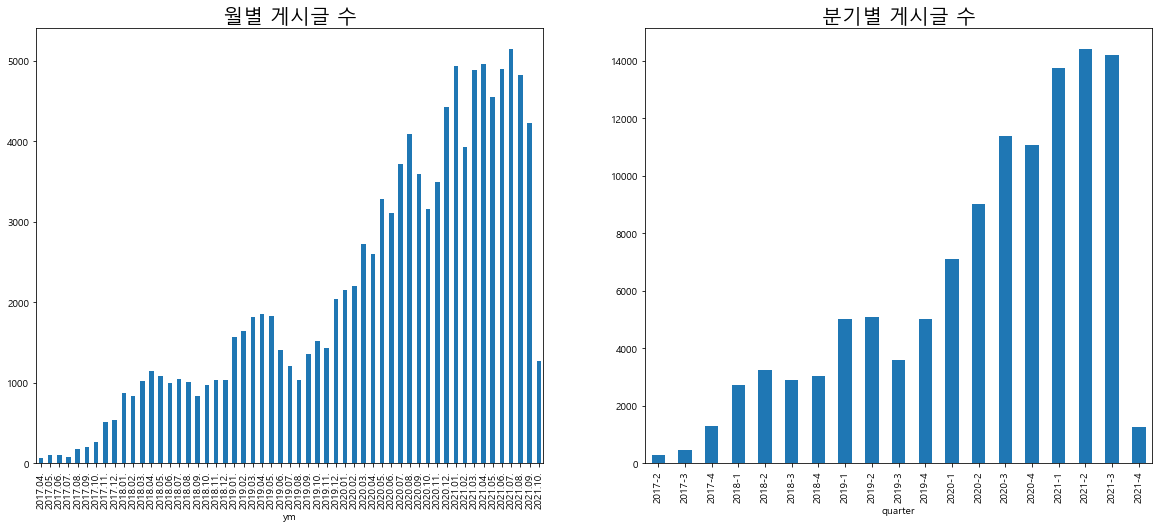

In [12]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
df_refined.groupby('ym')['id'].count().plot.bar()
plt.title('월별 게시글 수', size=20)

plt.subplot(1, 2, 2)
df_refined.groupby('quarter')['id'].count().plot.bar()
plt.title('분기별 게시글 수', size=20)
plt.show()

In [88]:
df_refined

,id,title,date,view,like,noComment,content,tokens,ym,quarter
0,1060939,보통 자기 똥으로 막힌 변기는 자기가 뚫으려 하지 않나요,2021.10.08.,420,0,8,모텔 운영중입니다.\n보통 손님들을 보면 자기가 막히게 한 변기는 다 자기가 처리해...,"[모텔, 운영, 막히, 변기, 처리, 그렇, 보이, 부끄럽, 퇴실, 막히, 경우, ...",2021.10.,2021-4
1,1060927,개미 없애는 방법,2021.10.08.,141,2,4,모텔인데 객실에 자꾸 개미들이 나와서\n손님들이 불만 가졌었어요.\n그래서 이방법 ...,"[모텔, 객실, 개미, 나오, 불만, 가지, 방법, 방법, 맥스, 포스, 퀀텀, 개...",2021.10.,2021-4
2,1060671,광주 근처 놀려갈말한 콘도 없을까요?,2021.10.08.,134,1,5,전라도 광주 살아요\n광주 말구요\n광주 근교로 해서 놀러갈만한 \n콘도 없을까요?,"[전라도, 광주, 광주, 광주, 근교]",2021.10.,2021-4
3,1059729,얼룩 과탄산으로도 안지워지면 답없을까요?,2021.10.07.,96,0,2,이불이나 시트커버에 뭐 묻은거\n뜨거운물에 과탄산해도 안지워지면 답없겠죠?ㅠㅠ\n혹...,"[이불, 시트, 커버, 뜨겁, 과탄산해, 방법, 알, 계시, 알리, 버리]",2021.10.,2021-4
4,1059720,모텔에 안마의자나 스타일러 놓음 어떨까요?,2021.10.07.,495,1,17,객실 안마의자나 스타일러가 매출에 얼마나 도움이 될까요?\n선택시에 좀 더 고려하려...,"[객실, 안마, 의자, 스타일러, 매출, 도움, 선택, 고려하려, 고민, 의견, 부...",2021.10.,2021-4
...,...,...,...,...,...,...,...,...,...,...
114915,270092,요가센터 샵인샵 아이디어!,2019.05.09.,618,0,6,요가센터 내 샵인샵을 들여보려고 합니다.\n \n모두 같은고민이시겠지만\n건물 임대...,"[요가, 센터, 샵인샵, 들이, 고민, 건물, 임대료, 관리비, 직원, 인건비, 네...",2019.05.,2019-2
114916,265432,요가 샤워실 고민중 도와주세요^^,2019.04.28.,407,0,7,요가 인테리어 준비중 입니다.\n샤워실 때문에 고민중 입니다.\n제가 알아보니 조립...,"[요가, 인테리어, 준비, 샤워실, 때문, 고민, 알아보, 조립, 샤워, 부스, 공...",2019.04.,2019-2
114917,230936,헬스장 시작하려 합니다..,2019.02.08.,1189,1,30,(글시작)\n안녕하세요 예비사장입니당ㅎ\n보증금 6000 월세 350에\n권리없이 ...,"[안녕, 예비사장입니, 보증금, 월세, 권리, 처음, 인테리어, 시작, 인테리어, ...",2019.02.,2019-1
114918,191774,필라테스 요가 업계 계신분들~,2018.10.22.,1619,1,27,기구필라테스센터 인수한지 열흘됐습니다-\n프랜차이즈라 매니저.강사.운영체계 그대로 ...,"[기구필라테스, 센터, 인수, 열흘, 프랜차이즈, 매니저, 강사, 운영, 체계, 가...",2018.10.,2018-4


### 최근이슈

In [121]:
# 최근 texts만 추출
lateTexts = [txt for txt, tf in zip(texts_nonstop, df_refined.ym>'2021') if tf == True]
#tokenizing
lateDocs = []
for result in tqdm(kiwi.analyze(lateTexts), total=len(lateTexts)):
    lateDocs.append(result[0][0])

#품사추출
lateTokenizedDocs = [[token.form for token in doc if token.tag[:2] in ['NN'] and token.len > 1] for doc in lateDocs ]

# 토큰DF
lateCounter = Counter()
for tokens in lateTokenizedDocs:
    lateCounter.update(tokens)

  0%|          | 0/43651 [00:00<?, ?it/s]

In [122]:
max_ = max(lateCounter.values())
min_ = min(lateCounter.values())
lateCounter = [(k, (v-min_)/(max_-min_)) for k, v in lateCounter.items()]
lateCounter = sorted(lateCounter, key=lambda x: x[1], reverse=True)
lateCounter

[('생각', 1.0),
 ('정도', 0.887957454479899),
 ('사장', 0.8561384532179557),
 ('카페', 0.8375698575806743),
 ('시간', 0.6296196142058771),
 ('매출', 0.5986118622678925),
 ('운영', 0.5794122949341987),
 ('매장', 0.5466919055345232),
 ('가게', 0.5413737155219037),
 ('판매', 0.5361456643230575),
 ('오픈', 0.5359653866955111),
 ('업체', 0.5024337479718767),
 ('사람', 0.49134667387777176),
 ('부탁', 0.49008473048494683),
 ('가능', 0.43933657833062917),
 ('시작', 0.4115738236884803),
 ('배달', 0.39688119704344693),
 ('창업', 0.3903912024517757),
 ('사용', 0.3841716243014242),
 ('준비', 0.3632594195060393),
 ('오늘', 0.35767081305210024),
 ('경우', 0.35658914728682173),
 ('고객', 0.3500991526951505),
 ('제품', 0.3314404182440959),
 ('사업자', 0.32594195060393005),
 ('코로나', 0.322065981611682),
 ('장사', 0.3151252929511448),
 ('주문', 0.3129619614205877),
 ('고민', 0.3111591851451235),
 ('이상', 0.30656210564268976),
 ('커피', 0.3052100234360916),
 ('전화', 0.2962862808725437),
 ('때문', 0.2920497566252028),
 ('상품', 0.2915990625563368),
 ('감사', 0.28772309356

In [111]:
df_refined[df_refined.ym<'2020']

,id,title,date,view,like,noComment,content,tokens,ym,quarter
1432,375879,"게스트하우스 사장님들 스텝 고용, 셀프체크인 어떡해 하고 계시나요??",2019.12.28.,433,0,5,게스트하우스 사장님들\n스텝 고용 어떡해 하고 계시나요???\n \n월급체제로 매니...,"[게스트하우스, 사장, 스텝, 고용, 계시, 월급, 체제, 매니저, 상주, 스텝, ...",2019.12.,2019-4
1433,375649,숙박시설 매수후 리모델링 목적의 자금대출 어떻게 해야하나요?,2019.12.28.,434,1,2,숙박시설 운영에 관심있어서 매수를 하려고 열심히 공부하고 알아보는 중 입니다. \n...,"[숙박, 시설, 운영, 관심, 매수, 공부, 알아보, 노후, 숙박, 시설, 매수, ...",2019.12.,2019-4
1434,375574,여기 펜션인데 이거 카메라 아닌가요?,2019.12.27.,3690,2,43,갑자기 천장을 보는데 나를 지켜보는 이녀석ᆢ\n불끄고 이걸 찍으니 초록색 불이 들어...,"[천장, 지켜보, 녀석, 초록색, 들어오, 웃기, 지금, 들어오, 씨씨티브, 오르,...",2019.12.,2019-4
1435,375442,편션 사장님 질문요!,2019.12.27.,383,0,10,간단히 설명할께요\n펜션 예약\n실내에서 고기 구우면안된답니다\nㅇㅋㅇㅋ \n이해...,"[설명, 펜션, 예약, 실내, 고기, 굽, 이해, 가능, 테라스, 전기, 그러, 어...",2019.12.,2019-4
1436,374926,게스트하우스 일순이익 20씩 생기려면 하루몇명 받아야하나요?,2019.12.26.,1256,0,9,게스트하우스 창업 지망생입니다^^(in도심)\n선배님들께 자문 구하고자 문의글 올립...,"[게스트, 하우스, 창업, 지망, 도심, 선배, 자문, 구하, 문의, 올리, 일순,...",2019.12.,2019-4
...,...,...,...,...,...,...,...,...,...,...
114915,270092,요가센터 샵인샵 아이디어!,2019.05.09.,618,0,6,요가센터 내 샵인샵을 들여보려고 합니다.\n \n모두 같은고민이시겠지만\n건물 임대...,"[요가, 센터, 샵인샵, 들이, 고민, 건물, 임대료, 관리비, 직원, 인건비, 네...",2019.05.,2019-2
114916,265432,요가 샤워실 고민중 도와주세요^^,2019.04.28.,407,0,7,요가 인테리어 준비중 입니다.\n샤워실 때문에 고민중 입니다.\n제가 알아보니 조립...,"[요가, 인테리어, 준비, 샤워실, 때문, 고민, 알아보, 조립, 샤워, 부스, 공...",2019.04.,2019-2
114917,230936,헬스장 시작하려 합니다..,2019.02.08.,1189,1,30,(글시작)\n안녕하세요 예비사장입니당ㅎ\n보증금 6000 월세 350에\n권리없이 ...,"[안녕, 예비사장입니, 보증금, 월세, 권리, 처음, 인테리어, 시작, 인테리어, ...",2019.02.,2019-1
114918,191774,필라테스 요가 업계 계신분들~,2018.10.22.,1619,1,27,기구필라테스센터 인수한지 열흘됐습니다-\n프랜차이즈라 매니저.강사.운영체계 그대로 ...,"[기구필라테스, 센터, 인수, 열흘, 프랜차이즈, 매니저, 강사, 운영, 체계, 가...",2018.10.,2018-4


In [136]:
earlyTexts = [d for d, tf in zip(tokenizedDocs, df_refined.ym>'2021') if tf == False]

# 토큰DF
earlyCounter = Counter()
for tokens in earlyTexts:
    earlyCounter.update(tokens)
    
max_ = max(earlyCounter.values())
min_ = min(earlyCounter.values())
earlyCounter = {k: (v-min_)/(max_-min_) for k, v in earlyCounter.items()}
sorted(earlyCounter.items(), key=lambda x: x[1], reverse=True)

[('생각', 1.0),
 ('정도', 0.9438565549676661),
 ('카페', 0.7995786792083088),
 ('드리', 0.7960023515579071),
 ('사장', 0.7938957475994513),
 ('가게', 0.5911228689006467),
 ('운영', 0.5831863609641388),
 ('창업', 0.5525671173819322),
 ('시간', 0.5384577699392514),
 ('부탁', 0.5352243778169704),
 ('매장', 0.5103860474230845),
 ('판매', 0.5010288065843621),
 ('나오', 0.4872623946698021),
 ('사람', 0.48417597491671566),
 ('매출', 0.47565157750342935),
 ('오픈', 0.47408387223202036),
 ('업체', 0.4684989222026259),
 ('어떻', 0.4593376445228297),
 ('시작', 0.4329316088575348),
 ('준비', 0.42592592592592593),
 ('모르', 0.41965510484029),
 ('가능', 0.39800117577895355),
 ('만들', 0.3942288849696257),
 ('장사', 0.3830589849108368),
 ('계시', 0.3492063492063492),
 ('알', 0.34543405839702135),
 ('사용', 0.3398980991573584),
 ('힘들', 0.33769351361943956),
 ('그렇', 0.3370566333529296),
 ('가지', 0.3122672937487752),
 ('경우', 0.31025867136978247),
 ('커피', 0.3062904174015285),
 ('직원', 0.30232216343327456),
 ('배달', 0.2977660199882422),
 ('고민', 0.2974230844601

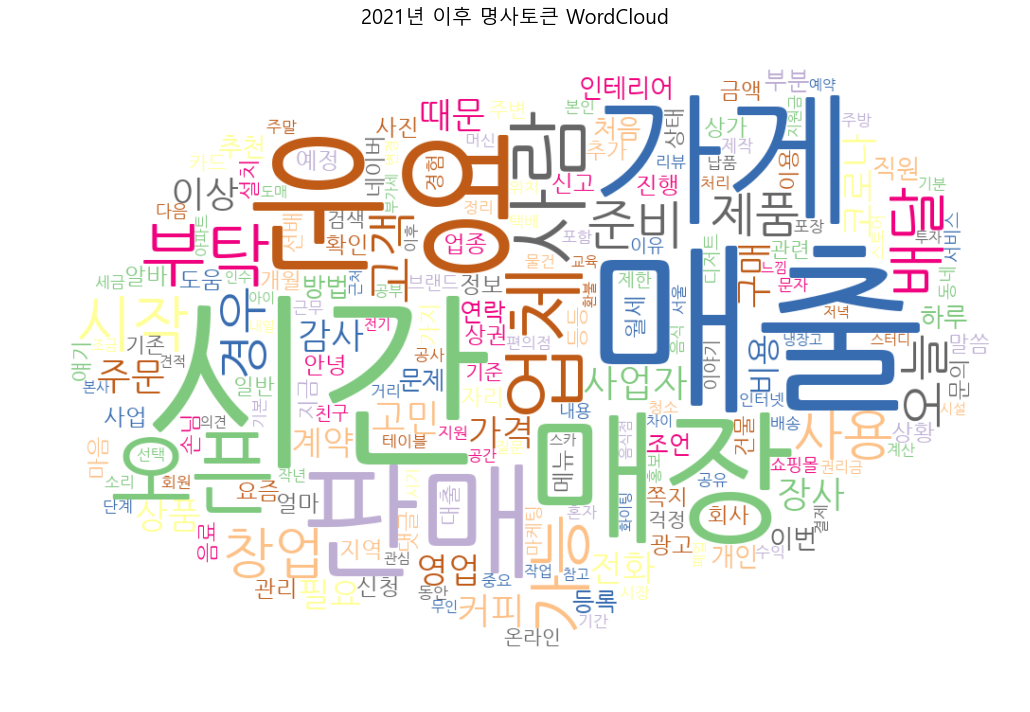

In [127]:
mask = np.array(Image.open('cloud.png'))
plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.Accent, mask=mask[100:-130, 130:-130, 0])
wc = wc.generate_from_frequencies({k : v for k, v in lateCounter[4:]})
plt.imshow(wc, interpolation='bilinear')
plt.title('2021년 이후 명사토큰 WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

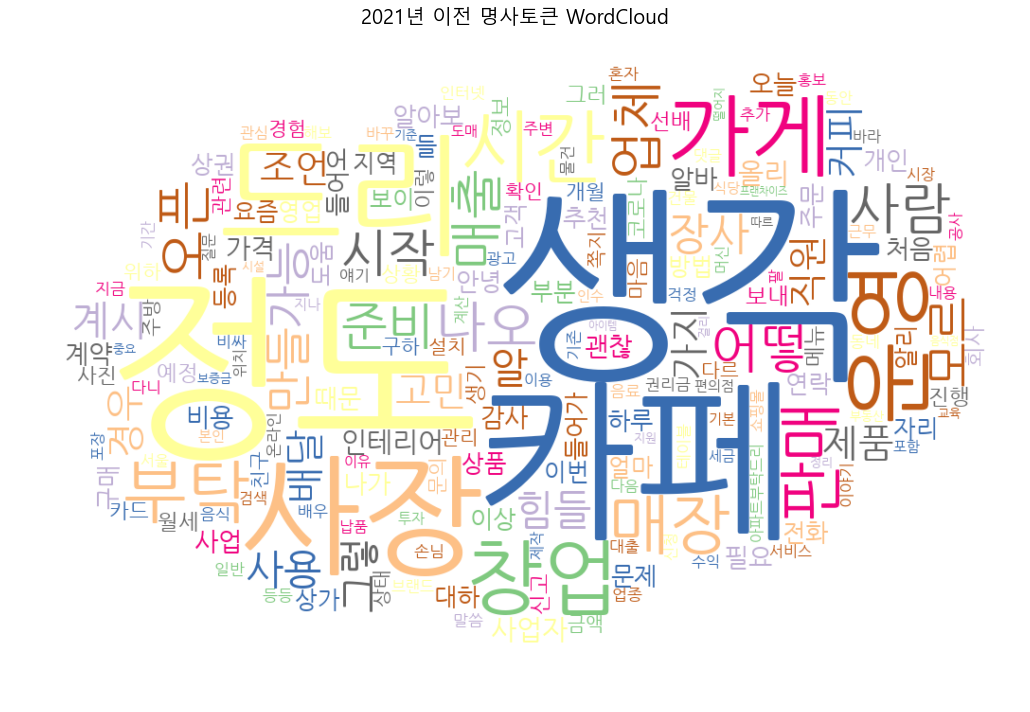

In [137]:
mask = np.array(Image.open('cloud.png'))
plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.Accent, mask=mask[100:-130, 130:-130, 0])
wc = wc.generate_from_frequencies(earlyCounter)
plt.imshow(wc, interpolation='bilinear')
plt.title('2021년 이전 명사토큰 WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

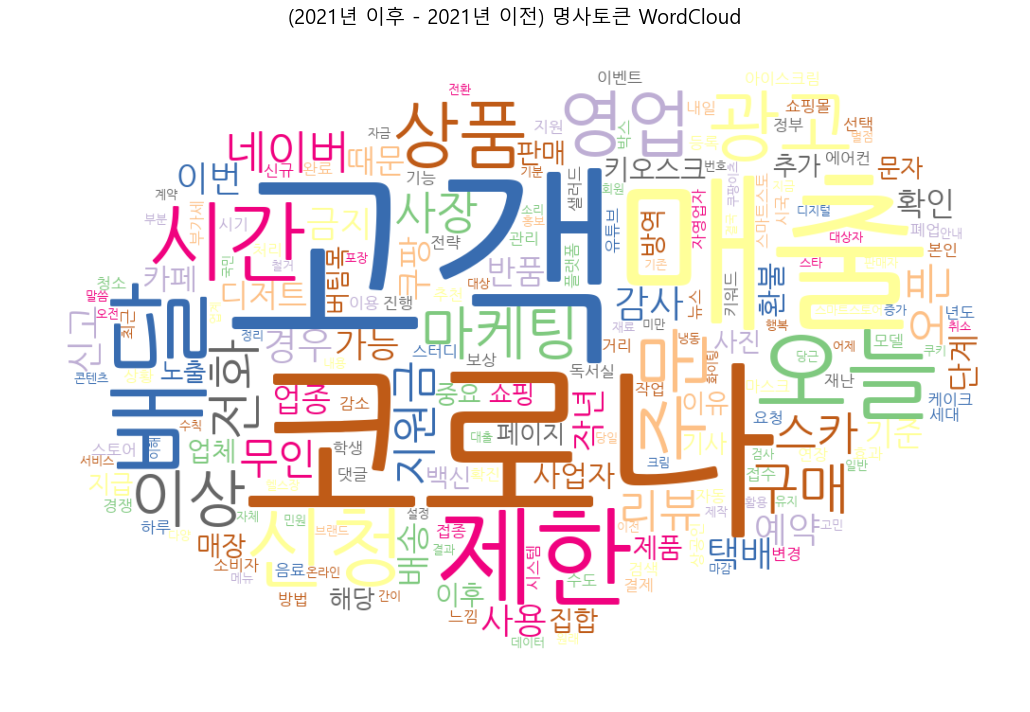

In [149]:
gap = {k : v-earlyCounter.get(k, 0) for k, v in lateCounter} 
mask = np.array(Image.open('cloud.png'))
plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.Accent, mask=mask[100:-130, 130:-130, 0])
wc = wc.generate_from_frequencies(gap)
plt.imshow(wc, interpolation='bilinear')
plt.title('(2021년 이후 - 2021년 이전) 명사토큰 WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [101]:
%%time
# 월별 토큰수 세기
def countTokens(tokenSeries):
    global tokens
    counter = Counter()
    for tokens in tokenSeries:
        counter.update(set(tokens))
#     max_ = max(counter.values())
#     sum_ = sum(counter.values())
    total = len(tokenSeries) # 게시글수로 정규화
    ret = [(k, v/total) for k, v in counter.items() if v/total > 0.005] #해당시즌 비율로 정규화
    return ret 

def mergeDf(groupToken):
    df_token = pd.DataFrame()
    for idx, name in enumerate(groupToken.index):
        df_temp = pd.DataFrame(groupToken[idx], columns=['token', f'prop_{name.replace(".", "")}'])
        if df_token.empty:
            df_token = df_temp
        else:
            df_token = pd.merge(df_token, df_temp, on='token', how='outer')
    return df_token.fillna(0)

def sortRank(groupMerge):
    ranking = groupMerge.sum(axis=1).rank(method='first').reset_index().sort_values(0,ascending=False).index #전체비율의 합으로 순위매김
    groupMerge = groupMerge.iloc[ranking].reset_index(drop=True)    
    return groupMerge.set_index('token')

monthlyToken = df_refined.query('"2018" < ym < "2021.10"').groupby('ym')['tokens'].apply(lambda x: countTokens(x))
quarterToken = df_refined.query('"2018" < ym < "2021.10"').groupby('quarter')['tokens'].apply(lambda x: countTokens(x))
monthlyMerge= mergeDf(monthlyToken)
quarterMerge= mergeDf(quarterToken)

Wall time: 4.01 s


In [103]:
quarterMerge.set_index('token')

,prop_2018-1,prop_2018-2,prop_2018-3,prop_2018-4,prop_2019-1,prop_2019-2,prop_2019-3,prop_2019-4,prop_2020-1,prop_2020-2,prop_2020-3,prop_2020-4,prop_2021-1,prop_2021-2,prop_2021-3
token,,,,,,,,,,,,,,,
정도,0.189901,0.216450,0.192958,0.165411,0.175850,0.179724,0.183984,0.194572,0.164528,0.158432,0.150526,0.150627,0.142037,0.154604,0.142364
매출,0.081229,0.086580,0.079392,0.071078,0.067237,0.076969,0.074259,0.090002,0.083604,0.078050,0.072018,0.081266,0.083697,0.083409,0.083011
부탁드리,0.028174,0.029375,0.039696,0.041598,0.030237,0.036024,0.033804,0.027340,0.029466,0.026757,0.027105,0.025616,0.026446,0.030740,0.025417
운영,0.124771,0.125850,0.123921,0.124140,0.118759,0.118307,0.112497,0.132309,0.097702,0.104918,0.103509,0.114368,0.106292,0.103393,0.091460
괜찮,0.057446,0.081014,0.067311,0.068457,0.055500,0.064961,0.077030,0.073039,0.058367,0.062729,0.055877,0.060702,0.058413,0.065228,0.057734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
접종,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007322
경찰,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005562
백신,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009998


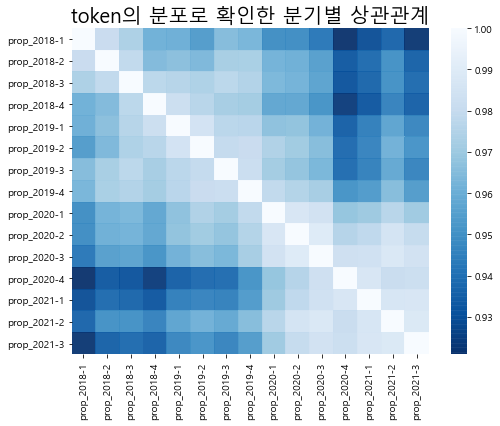

코로나 전/후에 따라 상관관계값이 차이가 남


In [360]:
plt.figure(figsize=(8, 6))
plt.title('token의 분포로 확인한 분기별 상관관계', size=20)
sns.heatmap(quarterMerge.set_index('token').corr(), cmap=plt.cm.Blues_r, alpha=0.95)
plt.show()
print('코로나 전/후에 따라 상관관계값이 차이가 남')

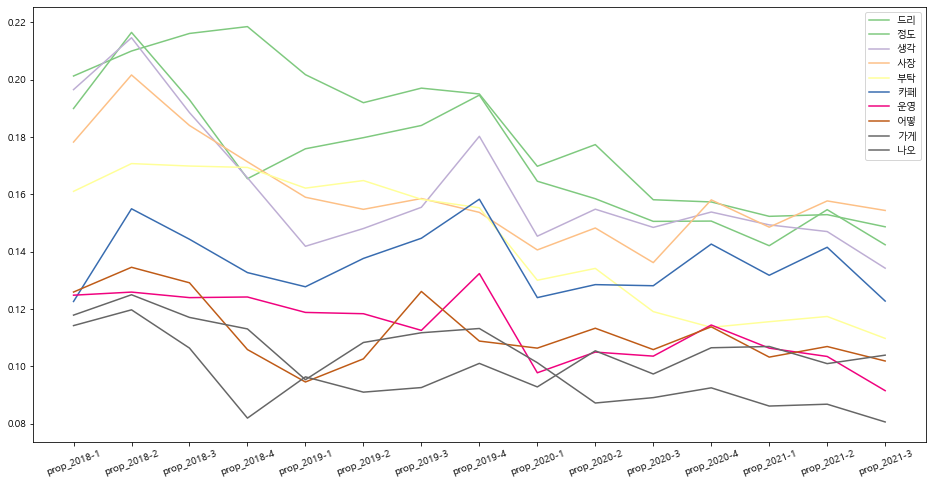

In [250]:
#의미없음
temp = sortRank(quarterMerge)
sizeN = 10
temp.T.iloc[:, :sizeN].plot(figsize=(16, 8), cmap=plt.cm.Accent)
plt.xticks([i for i in range(len(temp.columns))], temp.columns, rotation=20)
plt.legend(loc='upper right')
plt.show()

# 군집분석

In [157]:
%%time
from sklearn.cluster import KMeans
X = quarterMerge.set_index('token')
X_reduce = X.loc[((X==0).sum(axis=1) < 10)].apply(lambda x: (x - x.mean())/x.std(), axis=1) ######threshold
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_reduce)
X_reduce['label'] = kmeans.labels_
print(len(X_reduce))

876
Wall time: 1.01 s


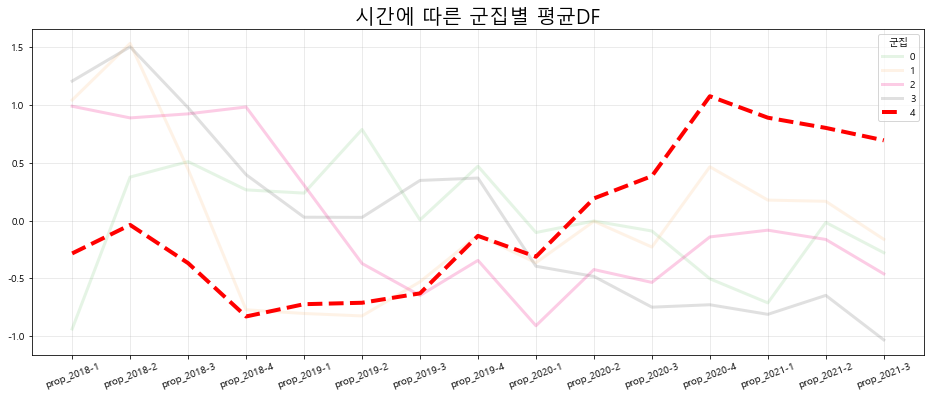

In [160]:
ax=X_reduce.query('label<4').groupby('label').mean().T.plot(figsize=(16, 6), cmap=plt.cm.Accent, linewidth=3, style='-', alpha=0.2)
ax=X_reduce.query('label==4').groupby('label').mean().T.plot(ax=ax, color='Red', linewidth=4, style='--', alpha=1)
# X_reduce.query('label>3').groupby('label').mean().T.plot(ax=ax, cmap=plt.cm.Accent, linewidth=3, style='-', alpha=0.2)
plt.xticks([i for i in range(len(X_reduce.columns)-1)], X_reduce.columns[:-1], rotation=20)
plt.legend(loc='upper right', title='군집')
plt.grid(alpha=0.3)
plt.title('시간에 따른 군집별 평균DF', size=20)
plt.show()

In [162]:
X_reduce.reset_index().groupby('label')['token'].count()

label
0    249
1     74
2    218
3    164
4    171
Name: token, dtype: int64

In [161]:
i = 4
X.loc[X_reduce.query(f'label=={i}').iloc[:, :-1].index]
X_reduce.loc[X_reduce.query(f'label=={i}').iloc[:, :-1].index]

,prop_2018-1,prop_2018-2,prop_2018-3,prop_2018-4,prop_2019-1,prop_2019-2,prop_2019-3,prop_2019-4,prop_2020-1,prop_2020-2,prop_2020-3,prop_2020-4,prop_2021-1,prop_2021-2,prop_2021-3,label
token,,,,,,,,,,,,,,,,
영업,0.336893,-0.749950,0.163646,-1.133260,-0.486823,-0.380758,-0.370609,-0.185198,-0.987090,-0.906497,-0.024424,1.863615,2.395835,-0.181027,0.645648,4
청소,-0.197554,-0.426372,-1.411120,-1.533073,-1.734678,0.128358,-0.555630,-0.082929,0.851227,1.811956,0.401123,0.759524,0.645990,0.797095,0.546084,4
최근,-0.290479,1.535166,-0.543495,-1.559139,-0.872120,-1.313436,0.091325,0.115348,-1.258281,-0.239368,0.168933,1.079299,0.594416,1.116880,1.374950,4
느낌,-0.373306,1.639011,-1.640262,-1.611743,-1.350007,-0.169666,-0.353948,0.535181,-0.418041,0.197793,-0.094153,1.096357,0.691930,0.983609,0.867244,4
전화,0.052166,-0.019104,1.572566,-0.397482,-1.668039,0.309917,-1.195375,-0.563608,-1.499129,-0.138881,-0.184742,1.361078,1.429808,0.246007,0.694819,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
응원,-0.770606,-0.770606,-0.770606,-0.770606,-0.770606,-0.770606,-0.770606,-0.770606,0.784224,-0.770606,1.271692,1.688551,1.032207,1.376421,0.782363,4
지원금,-0.710994,-0.710994,-0.710994,-0.710994,-0.710994,-0.710994,-0.710994,-0.710994,-0.710994,0.770996,0.316532,0.714099,2.040062,0.640585,1.916670,4
스마트스토어,-0.781721,-0.781721,-0.781721,-0.781721,-0.781721,-0.781721,-0.781721,-0.781721,-0.781721,1.272396,0.916116,1.400490,1.410342,1.114413,0.921734,4


In [162]:
print(list(X_reduce.query(f'label=={i}').iloc[:, :-1].index))

['영업', '청소', '최근', '느낌', '전화', '예약', '고객', '들어오', '네이버', '힘들', '환불', '시기', '해당', '영향', '자동', '기대', '달리', '집중', '기능', '지나가', '후기', '지키', '이후', '오늘', '전체', '효과', '지급', '인하', '체크', '주일', '단계', '따지', '확인', '거리', '대상', '신청', '의자', '바닥', '음료', '보내', '노출', '추가', '기준', '걸리', '수도', '기다리', '진짜', '행복', '작년', '바꾸', '위탁', '미만', '이전', '정부', '제한', '처리', '마감', '문자', '동일', '원래', '와이프', '피해', '기분', '설정', '센터', '어쩌', '쇼핑', '새벽', '스타', '주문', '페이지', '배송', '포장', '배달', '터지', '택배', '화이팅', '손님', '실수', '할인', '요청', '모두', '힘내', '번호', '올해', '누르', '판매자', '이벤트', '버티', '결제', '단골', '상관없', '내일', '재료', '박스', '아침', '어제', '기사', '끝나', '오전', '똑같', '상공인', '과세', '종일', '버리', '다행', '아웃', '자영업자', '디저트', '교체', '폐업', '이러', '오븐', '짜증', '학생', '김밥', '미용실', '테이크', '간식', '샌드위치', '대처', '단체', '결론', '일정', '취소', '통화', '수정', '붙이', '안내', '리뷰', '예쁘', '며칠', '아이스', '떡볶이', '아이스크림', '난리', '저렇', '과자', '저번', '우유', '케이크', '크림', '당일', '독서실', '월요일', '정상', '강아지', '무인', '반품', '스터디', '냉장', '배민', '불안', '키오스크', '영상', '고장', '코로나', '시국', '유튜브', '이기', '마스크', 

In [378]:
sorted([len(txt) for txt in tokenizedDocs])[-20:]

[1142,
 1187,
 1276,
 1276,
 1290,
 1296,
 1318,
 1329,
 1373,
 1423,
 1583,
 1610,
 1779,
 2005,
 2080,
 2264,
 2547,
 3075,
 3962,
 10429]

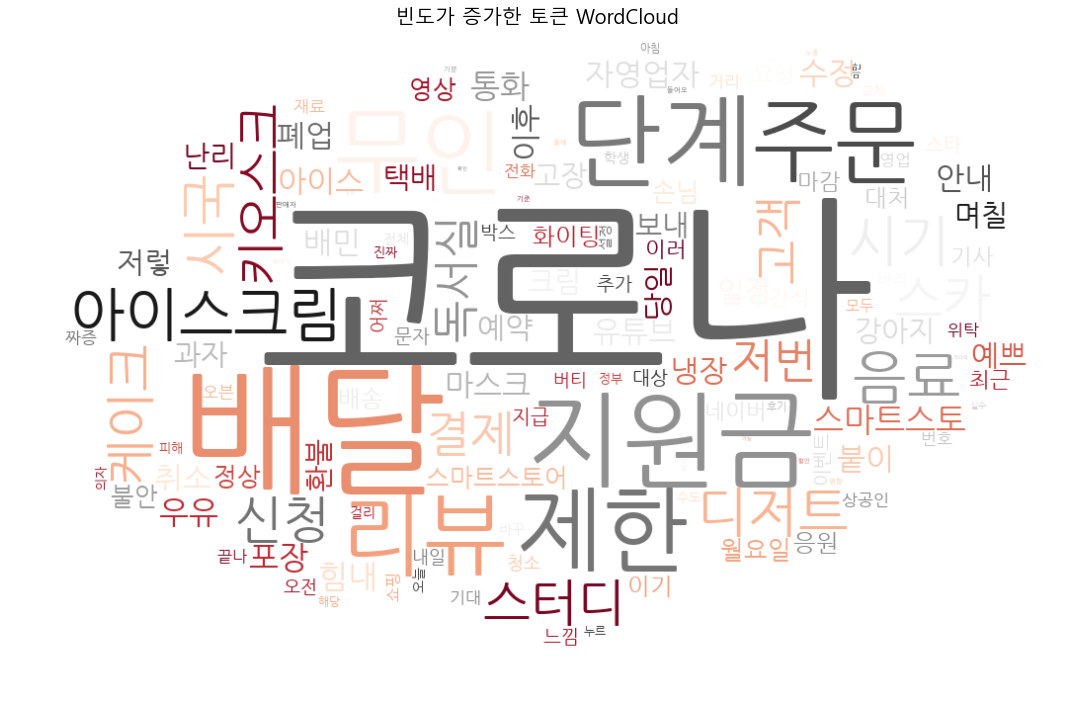

In [164]:
gap_word = X.loc[X_reduce.query('label==4').index, ['prop_2018-1', 'prop_2021-3']].diff(axis=1)['prop_2021-3'].to_dict()
mask = np.array(Image.open('cloud.png'))

plt.figure(figsize=(16, 10))
wc = WordCloud(font_path='C:/Users/82105/Downloads/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf',
                background_color='white', 
               width=1600, height=600, 
               relative_scaling=0.7,
                colormap=plt.cm.RdGy, mask=mask[130:-130, 130:-130, 0])
wc = wc.generate_from_frequencies(gap_word)
plt.imshow(wc, interpolation='bilinear')
plt.title('빈도가 증가한 토큰 WordCloud', size=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [538]:
temp = df_refined[df_refined.content.str.contains('짜증')]#.content.iloc[200]
print(temp.shape)
temp.groupby('quarter')[['id']].count()

(958, 10)


,id
quarter,
2017-2,10
2017-3,7
2017-4,16
2018-1,18
2018-2,18
2018-3,18
2018-4,14
2019-1,21
2019-2,35


# 너무 적게 나오는 토큰들 제거
# 클러스터링
# 군집별 단어들 추출
# 분기별 시제어 파악

# Network

In [379]:
len(tokenizedDocs)

114920

In [79]:
%%time 
# tdm 만들기
cv = CountVectorizer(analyzer= lambda x: x, min_df=0) ###### threshold
tdm = cv.fit_transform(tokenizedDocs)

Wall time: 4.87 s


In [78]:
type(lateTokenizedDocs), type(tokenizedDocs)

(list, list)

In [80]:
# node - weight 만들기
from itertools import combinations as cb
freqCounter =Counter()
names = np.array(cv.get_feature_names())

for i in tqdm(range(tdm.shape[0])):
    tokens = names[(tdm[i].toarray()>1)[0]]
    c = cb(tokens, 2)
    freqCounter.update(c)

  0%|          | 0/114920 [00:00<?, ?it/s]

In [91]:
sorted(weightedNode, key=lambda x: x[1], reverse=True)[:10]

[(('카페', '키오스크'), 62),
 (('업체', '키오스크'), 51),
 (('스터디', '키오스크'), 43),
 (('생각', '키오스크'), 41),
 (('사용', '키오스크'), 37),
 (('정도', '키오스크'), 36),
 (('운영', '키오스크'), 36),
 (('드리', '키오스크'), 31),
 (('시간', '키오스크'), 28),
 (('창업', '키오스크'), 27)]

In [573]:
sorted(subWeightedNode, key=lambda x: x[1], reverse=True)[:10]

[(('생각', '정도'), 1576),
 (('사장', '생각'), 1036),
 (('사람', '생각'), 1035),
 (('생각', '카페'), 1006),
 (('매출', '정도'), 966),
 (('생각', '시간'), 940),
 (('드리', '부탁'), 915),
 (('생각', '운영'), 903),
 (('생각', '시작'), 873),
 (('생각', '창업'), 861)]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/1571 [00:00<?, ?it/s]

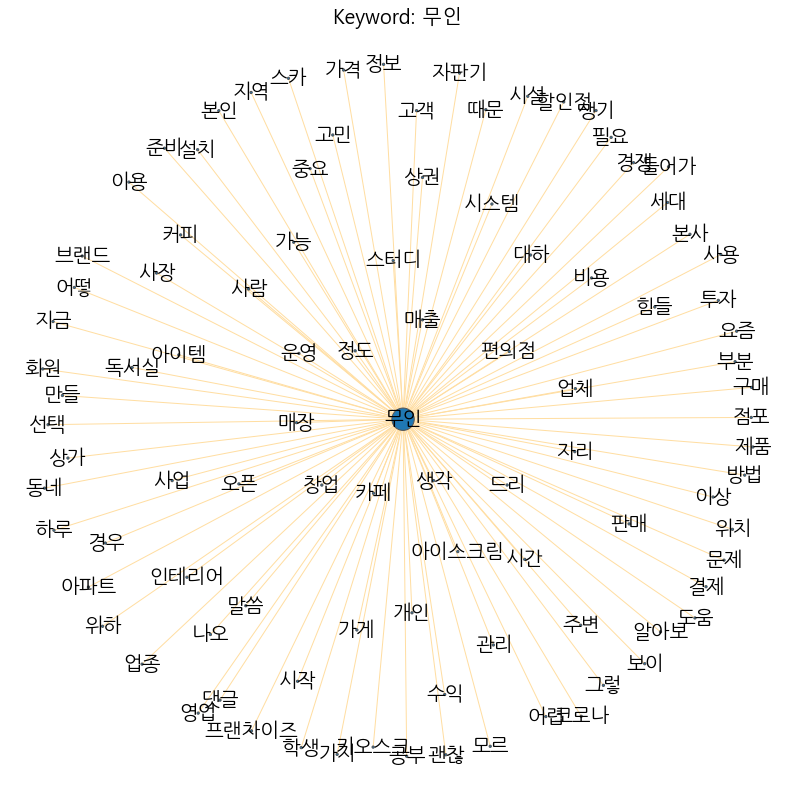

In [172]:
nFreq = 10
keyword = '무인'
sub = False

weightedNode = [(w, v) for w, v in freqCounter.items() if w[0]==keyword or w[1]==keyword]
if sub:
    subNode = [w[0] if w[1] == keyword else w[1] for w, v in weightedNode if v > nFreq*1.5]
    subWeightedNode = [(w, v) for w, v in freqCounter.items() 
                       if (w[0] in subNode or w[1] in subNode) 
                       and (w[0]!=keyword or w[1]!=keyword) 
                       and v > nFreq]


G = nx.Graph()

for (w1, w2), weight in weightedNode:
    if weight > nFreq:
        G.add_edge(w1, w2, weight=weight)

if sub:
    for (w1, w2), weight in subWeightedNode:
        if weight > nFreq:
            G.add_edge(w1, w2, weight=weight)

dgr = nx.degree_centrality(G)
pgr = nx.pagerank(G)

sorted_pgr = sorted(pgr.items(), key=lambda x: x[1], reverse=True)

G2 = nx.Graph()
for d in tqdm(dgr.items()):
    G2.add_node(d[0], nodesize=d[1])

    
for (w1, w2), weight in tqdm(weightedNode):
    if weight > nFreq:
        G2.add_weighted_edges_from([[w1, w2, weight]])
        
if sub:
    for (w1, w2), weight in tqdm(subWeightedNode):
        if weight > nFreq:
            G2.add_weighted_edges_from([[w1, w2, weight]])

        
sizes = [G2.nodes[node]['nodesize']*500 for node in G2]

options = {
    'edge_color' : '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}


plt.figure(figsize=(14, 14))
plt.title(f'Keyword: {keyword}', size=20)
fm._rebuild()
nx.draw(G2, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options,
        font_family='NanumGothic', font_size=20)
ax = plt.gca()
ax.collections[0].set_edgecolor('#555555')
plt.show()

In [ ]:
# tdm, corr = plot_network(tokenizedDocs)